In [168]:
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedKFold
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,multilabel_confusion_matrix,roc_auc_score,roc_curve,auc,ConfusionMatrixDisplay,precision_score,recall_score

In [93]:
x_train_all=pd.read_csv("CompleteDataSet/x_train_all.csv")
y_train_all=pd.read_csv("CompleteDataSet/y_train_all.csv")
x_test_all=pd.read_csv("CompleteDataSet/x_test_all.csv")
y_test_all=pd.read_csv("CompleteDataSet/y_test_all.csv")

### Function for using normal decision tree and getting the values for the metrics

In [ ]:
#function that uses the train test split data
def train_test_split(X_train,X_test,y_test,y_train):
    dt_classifier = DecisionTreeClassifier()#initializing the tree 
    dt_classifier.fit(X_train,y_train)# fitting the tree 
    predicted=dt_classifier.predict(X_test)# predicting the values
    #finding the probability predictions
    predicted_probs = dt_classifier.predict_proba(X_test)
    
    #finding the accuracy
    accuracy = accuracy_score(y_test,predicted )
    #finding the f1
    f1 = f1_score(predicted, y_test, average="weighted")
    #finding the confusion matrix
    conf_matrix = confusion_matrix(y_test, predicted)
    #finding the precision
    precision = precision_score(y_test, predicted, average="weighted",zero_division=1)
    #finding the recall
    recall = recall_score(y_test, predicted, average="weighted")
    #finding the roc
    Y_test_bin = label_binarize(y_test, classes=[0, 1, 2,3,4,5,6,7,8,9])
    roc = roc_auc_score(Y_test_bin, predicted_probs, multi_class="ovr", average="weighted")

    fpr, tpr, _ = roc_curve(Y_test_bin.ravel(), predicted_probs.ravel())
    #plotiing the AUC graph
    auc_val = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC (area = %0.2f)' % auc_val)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    #plotting the confusion matrix 
    out=ConfusionMatrixDisplay(conf_matrix,display_labels=dt_classifier.classes_)
    out.plot()
    plt.show()
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Precision:", precision)
    print("Recall/Sensitivity/True Positive Rate:", recall)
    print("False Positive Rate:", fpr)
    print("Area under ROC curve:", roc)
    print("Confusion Matrix:\n", conf_matrix)



### Cross Validation

#### LOOCV

In [94]:
from sklearn.model_selection import KFold 


In [170]:
#function that performs 10-fold cross validation
def kfold_10(input,output,splits=10):
    kf = KFold(n_splits=splits,shuffle=True,random_state=42) #initializing the kfold with 10 splits
    dt_classifier = DecisionTreeClassifier() #initializing the tree
    #lists to store the evaluation metrics
    accuracy_scores = [] 
    prec_scores = []
    roc_scores=[]
    f1_scores = []
    recall_scores=[]
    #loop to iterate over the folds
    for train_index, test_index in kf.split(input):
        #priting the lengths of each index
        print("Train:", len( train_index), "Validation:",len(test_index))
        X_train, X_test = input.iloc[train_index], input.iloc[test_index] 
        y_train, y_test = output.iloc[train_index], output.iloc[test_index]
        #train the decision tree model
        dt_classifier.fit(X_train, y_train)
        #predict on the x_test data
        pred=dt_classifier.predict(X_test)
        #finding the values for the various evaluation metrics
        accuracy = accuracy_score(y_test, pred)
        precision = precision_score(y_test, pred, average="weighted",zero_division=1)
        f1 = f1_score( y_test,pred, average="weighted")
        recall = recall_score( y_test, pred, average="weighted")   
        #storing the values from each iteration into a list   
        f1_scores.append(f1)
        recall_scores.append(recall)
        prec_scores.append(precision)
        accuracy_scores.append(accuracy)
        #finding the confusion matrix and printing it out for each model
        conf_matrix = confusion_matrix(y_test, pred)
        print("Confusion Matrix:\n", conf_matrix)

    # calclulating the average value of all the evaluation metrics
    avg_f1=sum(f1_scores)/10
    avg_recall=sum(recall_scores)/10
    avg_prec=sum(prec_scores)/10
    average_accuracy = sum(accuracy_scores) / 10
  
    # printing the final values
    print(f"Average Accuracy: {average_accuracy}")
    print(f"Average Precision: {avg_prec}")
    print(f"Average Recall: {avg_recall}")
    print(f"Average F1: {avg_f1}")

In [96]:
x_train_all.shape

(9690, 2304)

In [97]:
y_train_all.shape

(9690, 1)

### Fitting and Predicting with x_train

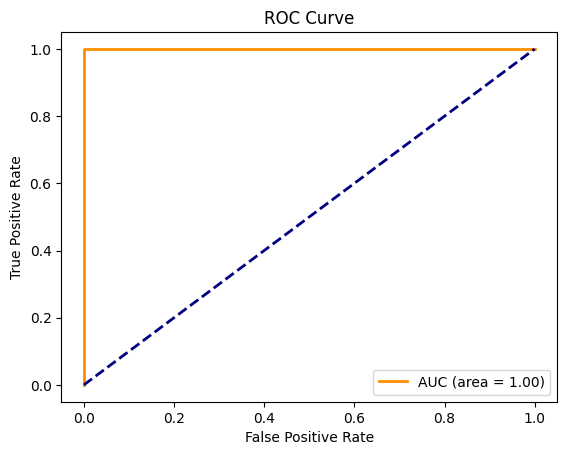

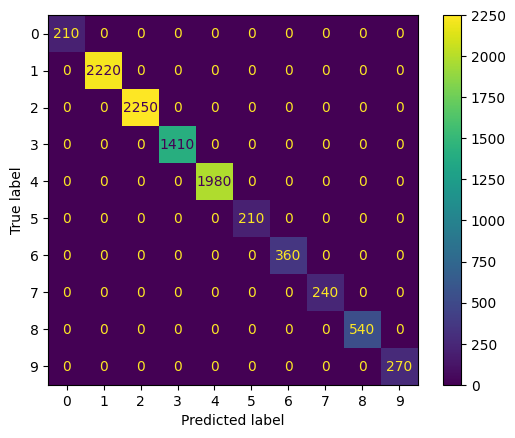

Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
Recall/Sensitivity/True Positive Rate: 1.0
False Positive Rate: [0. 0. 1.]
Area under ROC curve: 1.0
Confusion Matrix:
 [[ 210    0    0    0    0    0    0    0    0    0]
 [   0 2220    0    0    0    0    0    0    0    0]
 [   0    0 2250    0    0    0    0    0    0    0]
 [   0    0    0 1410    0    0    0    0    0    0]
 [   0    0    0    0 1980    0    0    0    0    0]
 [   0    0    0    0    0  210    0    0    0    0]
 [   0    0    0    0    0    0  360    0    0    0]
 [   0    0    0    0    0    0    0  240    0    0]
 [   0    0    0    0    0    0    0    0  540    0]
 [   0    0    0    0    0    0    0    0    0  270]]


In [230]:
train_test_split(x_train_all,x_train_all,y_train_all,y_train_all)

### Applying Kfold on x_train

In [171]:
kfold_10(x_train_all,y_train_all)

Train: 8721 Validation: 969
Confusion Matrix:
 [[ 21   1   2   1   1   0   0   0   0   1]
 [  3 185  12   3  12   0   2   2   1   1]
 [  2  17 190   7   4   0   2   2   1   3]
 [  1   2  12 122   2   0   2   0   1   0]
 [  2  11   3   0 180   0   0   1   0   1]
 [  1   1   3   1   0  18   0   2   1   1]
 [  1   0   0   1   3   0  28   1   0   0]
 [  0   2   1   0   1   1   0  19   0   1]
 [  1   0   2   1   1   0   1   0  31   0]
 [  0   2   1   2   0   1   0   1   0  22]]
Train: 8721 Validation: 969
Confusion Matrix:
 [[ 17   0   1   0   1   0   0   0   0   0]
 [  3 187  12   5  18   1   2   1   1   0]
 [  0  17 191   7   9   2   2   1   0   0]
 [  0   5  11 127   2   0   0   0   1   0]
 [  0   9  11   4 166   0   2   0   1   1]
 [  0   0   0   0   3  12   0   1   0   0]
 [  0   0   3   3   0   0  27   0   1   1]
 [  2   0   1   1   2   1   0  12   3   0]
 [  0   2   1   1   0   0   1   0  48   1]
 [  0   4   1   0   0   1   2   0   0  16]]
Train: 8721 Validation: 969
Confusion Matrix

#### Function for calculating decision tree accuracy

In [99]:
def accuracycalc(model,xdata,ydata,xtest,ytest): #func for calculating accuracy when the data is given
    dt_classifier = model #assigning the model
    dt_classifier.fit(xdata,ydata) #fitting the data into it
    pred=dt_classifier.predict(xtest) #predicting the labels for test data
    accuracy = accuracy_score(ytest, pred) #comparing and getting the accuracy
    print("Accuracy:",accuracy) #printing the accuracy

Calculating accuracy on the raw data

In [100]:
model = DecisionTreeClassifier() #creating the decision tree model by sklearn
accuracycalc(model,x_train_all,y_train_all,x_test_all,y_test_all) #calculating the accuracy for the respective datasets mentioned in the markdown

Accuracy: 0.686084142394822


In [101]:
#loading the pre processed dataset from part2
part2_pro = pd.read_csv("part2_final_processed.csv")
part2_pro_test = pd.read_csv("part2_final_processed_xtest.csv")
part2_pro_y = pd.read_csv("part2_y_train_no_outliers.csv")
part2_pro_y_test = pd.read_csv("part2_y_train_no_outliers_ytest.csv")

In [225]:
part2_pro_y.shape

(9593, 1)

Calculating accuracy on the preprocessed data from part2 of the coursework

In [104]:
model = DecisionTreeClassifier() #creating the decision tree model by sklearn
accuracycalc(model,part2_pro,part2_pro_y,part2_pro_test,part2_pro_y_test)#calculating the accuracy for the respective datasets mentioned in the markdown

Accuracy: 0.2360248447204969


Calculating accuracy on the preprocessed data from part1 of the coursework

In [226]:
part1_pro = pd.read_csv("processed_df_part1.csv")
part1_pro_y = y_train_all.copy()

In [227]:
model = DecisionTreeClassifier() #creating the decision tree model by sklearn
accuracycalc(model,part1_pro,part1_pro_y,x_test_all,y_test_all)#calculating the accuracy for the respective datasets mentioned in the markdown

Accuracy: 0.38090614886731394


### PreProcessing

Oversampling and calculating the accuracy

In [105]:
import pandas as pd
from imblearn.over_sampling import SMOTE

X = x_train_all #assigning x train data for oversampling
y = y_train_all #assigning y train data for oversampling
smote = SMOTE(sampling_strategy='auto', random_state=19) #initializing smote for applying oversampling
X_resampled, y_resampled = smote.fit_resample(X, y) #performing oversampling and assigning the new x train 
balanced_data = pd.concat([X_resampled, y_resampled], axis=1)#performing oversampling and assigning the new y train 
balanced_data.to_csv('balanced_dataset.csv', index=False) #saving the data


In [106]:
model = DecisionTreeClassifier() #creating the decision tree model by sklearn
accuracycalc(model,X_resampled,y_resampled,x_test_all,y_test_all)#calculating the accuracy for the respective datasets mentioned in the markdown

Accuracy: 0.6734627831715211


why less compared to raw data: Decision trees are sensitive to the distribution of data. Oversampling might create "unnatural" patterns that a decision tree tries to fit. 

Undersampling and calculating the accuracy

In [107]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

X = x_train_all #assigning x train data for undersampling
y = y_train_all #assigning y train data for undersampling
rus = RandomUnderSampler(sampling_strategy='auto', random_state=19)#initializing randomundersampler for applying undersampling
X_resampled2, y_resampled2 = rus.fit_resample(X, y) #performing undersampling and assigning the new x train 
balanced_data2 = pd.concat([X_resampled2, y_resampled2], axis=1) #performing undersampling and assigning the new y train 
balanced_data2.to_csv('balanced_dataset2.csv', index=False)#saving the data


In [108]:
model = DecisionTreeClassifier() #creating the decision tree model by sklearn
accuracycalc(model,X_resampled2,y_resampled2,x_test_all,y_test_all)#calculating the accuracy for the respective datasets mentioned in the markdown

Accuracy: 0.5521035598705502


why less comapared to raw data: By removing instances from the majority class, we might be discarding potentially useful information. Decision trees thrive on having diverse data to learn from. Undersampling could lead to a loss of valuable patterns and information that the model requires for accurate predictions.

label Encoding and calculating the accuracy

In [111]:
#creating the complete data set with y labels at the end with column name labels
y_train_all_copy = y_train_all.rename(columns={y_train_all.columns[0]:"labels"})
completedata = pd.concat([x_train_all,y_train_all_copy], axis=1)

In [112]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() #initializing the encoder
completedata['labels'] = le.fit_transform(completedata['labels'])#applying the encoding

In [119]:
completedata_noy = completedata.drop(columns =['labels'])
model = DecisionTreeClassifier() #creating the decision tree model by sklearn
accuracycalc(model,completedata_noy,y_train_all,x_test_all,y_test_all)#calculating the accuracy for the respective datasets mentioned in the markdown

Accuracy: 0.6870550161812298


Accuracy similar to raw data no difference

Outlier mining on raw data and calculating accuracy

In [123]:
# uses isolation forest algorithm to find outliers
from sklearn.ensemble import IsolationForest

# TODO
feature_names = [f'{str(col)}' for col in x_train_all.columns]
x_train_copy = x_train_all.copy()
x_train_copy.columns = feature_names

contamination = 0.01
iso_forest = IsolationForest(contamination=contamination, random_state=42)

outliers = iso_forest.fit_predict(x_train_copy)

outlier_indices = x_train_copy.index[outliers == -1]

x_train_no_outliers = x_train_copy.drop(outlier_indices)
x_train_no_outliers.to_csv('x_train_no_outliers.csv',index=False)

outlier_indices_df = pd.DataFrame({'outlier_index': outlier_indices})

outlier_indices_df.to_csv('outlier_indices.csv', index=False)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [124]:
y_train_no_outliers  = y_train_all.drop(outlier_indices)

In [125]:
model = DecisionTreeClassifier() #creating the decision tree model by sklearn
accuracycalc(model,x_train_no_outliers,y_train_no_outliers,x_test_all,y_test_all)#calculating the accuracy for the respective datasets mentioned in the markdown

Accuracy: 0.6896440129449838


as we can see the accuracy increased by a little that is because we had outliers.

Normalized Data and accuracy

In [126]:
#normalizing the data
mean=x_train_all.mean()
std=x_train_all.std()
x_train_norm=(x_train_all-mean)/std
x_train_norm=pd.DataFrame(x_train_norm)

In [127]:
model = DecisionTreeClassifier() #creating the decision tree model by sklearn
accuracycalc(model,x_train_norm,y_train_all,x_test_all,y_test_all)#calculating the accuracy for the respective datasets mentioned in the markdown

Accuracy: 0.24271844660194175


why less compared to raw data: Normalization could accentuate certain features, affecting their importance, potentially altering the tree's decisions in an unintended way.

Thresholding and accuracy

In [128]:
import pandas as pd
import cv2
import numpy as np

df = x_train_all.copy()

for index, row in df.iterrows(): # Loop through the rows of the DataFrame
    pixel_values = row.values # Extract the pixel values as a 1D array
    image = np.array(pixel_values).reshape(48, 48)# Reshape the pixel values to form a 48x48 grayscale image 
    threshold_value = 128 # Setting the threshold value
    _, binary_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY) # Apply thresholding
    binary_pixel_values = binary_image.reshape(-1) # Flatten the binary image to a 1D array
    df.loc[index] = binary_pixel_values# Update the DataFrame with the binary pixel values



In [133]:
import pandas as pd
import cv2
import numpy as np


df2 = x_test_all.copy()

for index, row in df2.iterrows(): # Loop through the rows of the DataFrame
    pixel_values = row.values# Extract the pixel values as a 1D array
    image = np.array(pixel_values).reshape(48, 48) # Reshape the pixel values to form a 48x48 grayscale image
    threshold_value = 128# Setting the threshold value
    _, binary_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)# Apply thresholding
    binary_pixel_values = binary_image.reshape(-1) # Flatten the binary image to a 1D array
    df2.loc[index] = binary_pixel_values # Update the DataFrame with the binary pixel values



In [135]:
model =DecisionTreeClassifier() #creating the decision tree model by sklearn
accuracycalc(model,df,y_train_all,df2,y_test_all)#calculating the accuracy for the respective datasets mentioned in the markdown

Accuracy: 0.4627831715210356


why less compared to raw data: Decision trees can naturally handle continuous features and are capable of finding the best splitting points. Applying thresholding might overly simplify the decision-making process, leading to less accurate results.

Normalize the data then thresholding

In [137]:
x_train_norm.shape

(9690, 2304)

In [138]:
import pandas as pd
import cv2
import numpy as np

df3 = x_train_norm.copy()

for index, row in df3.iterrows():# Loop through the rows of the DataFrame
    pixel_values = row.values # Extract the pixel values as a 1D array
    image = np.array(pixel_values).reshape(48, 48) # Reshape the pixel values to form a 48x48 grayscale image
    threshold_value = 128 # Setting the threshold value
    _, binary_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)# Apply thresholding
    binary_pixel_values = binary_image.reshape(-1) # Flatten the binary image to a 1D array 
    df3.loc[index] = binary_pixel_values # Update the DataFrame with the binary pixel values



In [139]:
model =DecisionTreeClassifier() #creating the decision tree model by sklearn
accuracycalc(model,df3,y_train_all,df2,y_test_all)#calculating the accuracy for the respective datasets mentioned in the markdown

Accuracy: 0.24271844660194175


Thresholding then Normalizing

In [141]:
df.shape

(9690, 2304)

In [142]:
#normalizing the threshholded data
mean=df.mean()
std=df.std()
x_train_thres_norm=(df-mean)/std
x_train_thres_norm=pd.DataFrame(x_train_thres_norm)

In [143]:
model =DecisionTreeClassifier() #creating the decision tree model by sklearn
accuracycalc(model,x_train_thres_norm,y_train_all,df2,y_test_all)#calculating the accuracy for the respective datasets mentioned in the markdown

Accuracy: 0.4656957928802589


Histogram equalized dataset and calculating accuracy

In [144]:
import pandas as pd
import numpy as np
import cv2

df = x_train_all.copy()

def apply_histogram_equalization(image):#function to apply histogram equalization to an individual image
    image_matrix = image.values.reshape(48, 48).astype(np.uint8)# Reshape the image data
    equalized_image = cv2.equalizeHist(image_matrix)# Applying histogram equalization
    equalized_image_vector = equalized_image.ravel()# Reshaping the equalized image back to a feature vector
    return equalized_image_vector

equalized_images = df.apply(apply_histogram_equalization, axis=1)# Appling histogram equalization to each image in the DataFrame
equalized_df = pd.DataFrame(list(equalized_images))# Creating a new DataFrame with the equalized images

equalized_df.to_csv("equalized_dataset.csv", index=False)# Saving the equalized data to a new CSV file


In [145]:
import pandas as pd
import numpy as np
import cv2

df = x_test_all.copy()

def apply_histogram_equalization(image): #function to apply histogram equalization to an individual image
    image_matrix = image.values.reshape(48, 48).astype(np.uint8)# Reshaping the image data 
    equalized_image = cv2.equalizeHist(image_matrix)# Applying histogram equalization
    equalized_image_vector = equalized_image.ravel()# Reshaping the equalized image back to a feature vector
    return equalized_image_vector

equalized_images = df.apply(apply_histogram_equalization, axis=1)# Applying histogram equalization to each image in the DataFrame

equalized_df_test = pd.DataFrame(list(equalized_images)) # Creating a new DataFrame with the equalized images

equalized_df_test.to_csv("equalized_dataset_test.csv", index=False)# Saving the equalized data to a new CSV file


In [148]:
model = DecisionTreeClassifier() #creating the decision tree model by sklearn
accuracycalc(model,equalized_df,y_train_all,equalized_df_test,y_test_all)#calculating the accuracy for the respective datasets mentioned in the markdown

Accuracy: 0.7427184466019418


The reason we used it is, in images where the contrast between different intensity levels is low, histogram equalization can redistribute the intensity values to cover a wider range. This can improve the perception of details in the images which is what we need in our case with the traffic sign.

Sobel operator

In [187]:
import pandas as pd
import numpy as np
import cv2

data1 = x_train_all.copy()
y_labels = y_train_all.copy()


processed_images = []# Create a list to store the processed images

for index, row in data1.iterrows():# Iterate through each row in the dataset
    image = row.values.reshape(48, 48).astype(np.uint8)# Reshape the 2304 features into a 48x48 image
    # Apply the Sobel filter to the image
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    
    sobel_image = np.sqrt(sobel_x ** 2 + sobel_y ** 2)# Combine the horizontal and vertical gradients
    
    sobel_image = (255 * (sobel_image - np.min(sobel_image)) / (np.max(sobel_image) - np.min(sobel_image))).astype(np.uint8)# Normalize the pixel values to the range [0, 255]
    
    sobel_features = sobel_image.ravel()# Flatten the image back to 2304 features
    
    processed_images.append(sobel_features)


processed_data = pd.DataFrame(processed_images)# Create a new DataFrame with the processed images

# Combine the processed data with the labels
#processed_data['label'] = y_labels
processed_data.to_csv("processed_dataset_sobel.csv", index=False) # Save the processed data to a new CSV file


In [188]:
import pandas as pd
import numpy as np
import cv2

data1_test = x_test_all.copy()
y_labels = y_test_all.copy()

processed_images = []# Create a list to store the processed images

for index, row in data1_test.iterrows():# Iterate through each row in the dataset
    image = row.values.reshape(48, 48).astype(np.uint8)# Reshape the 2304 features into a 48x48 image
    # Apply the Sobel filter to the image
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    
    sobel_image = np.sqrt(sobel_x ** 2 + sobel_y ** 2)# Combine the horizontal and vertical gradients
    
    sobel_image = (255 * (sobel_image - np.min(sobel_image)) / (np.max(sobel_image) - np.min(sobel_image))).astype(np.uint8)# Normalize the pixel values to the range [0, 255]
    
    sobel_features = sobel_image.ravel()# Flatten the image back to 2304 features
    
    processed_images.append(sobel_features)

processed_data_test = pd.DataFrame(processed_images)# Create a new DataFrame with the processed images

# Combine the processed data with the labels
#processed_data['label'] = y_labels

processed_data_test.to_csv("processed_dataset_sobel_test.csv", index=False)# Save the processed data to a new CSV file


In [189]:
model = DecisionTreeClassifier() #creating the decision tree model by sklearn
accuracycalc(model,processed_data,y_train_all,processed_data_test,y_test_all)#calculating the accuracy for the respective datasets mentioned in the markdown

Accuracy: 0.5828478964401295


why less compared to raw data: The Sobel operator focuses on detecting edges, potentially altering the original features or removing certain details that could be crucial for the decision tree to make accurate splits.

Histogram matching 

In [190]:
import cv2
import numpy as np
import pandas as pd

# Load your grayscale images dataset
images_df = x_train_all.copy()

# Choose specific image numbers
selected_image_numbers = [4421, 17, 30, 154, 169, 9320, 62, 105, 233, 122]

# Create a dictionary to store histograms for each image
histograms_dict = {}

# Iterate through each selected image
for i, image_number in enumerate(selected_image_numbers):
    # Extract the pixel values of the selected image
    selected_image_pixels = np.array(images_df.loc[image_number])

    # Convert the pixel values to np.uint8
    selected_image_pixels = selected_image_pixels.astype(np.uint8)

    # Convert the pixel values to a one-dimensional array
    selected_image_pixels = selected_image_pixels.ravel()

    # Print the shape and type of selected_image_pixels for debugging
    print(f"Image {i} - Shape: {selected_image_pixels.shape}, Type: {type(selected_image_pixels)}")

    # Calculate the histogram for the selected image
    selected_image_histogram = cv2.calcHist([selected_image_pixels], [0], None, [256], [0, 256])

    # Normalize the histogram
    cv2.normalize(selected_image_histogram, selected_image_histogram, 0, 255, cv2.NORM_MINMAX)

    # Save the histogram in the dictionary
    histograms_dict[f'selected_image_histogram{i}'] = selected_image_histogram

    # Save the histogram as a numpy array
    np.save(f'selected_image_histogram{i}.npy', selected_image_histogram)

# Optional: Save the dictionary for future reference
np.save('histograms_dict.npy', histograms_dict)


Image 0 - Shape: (2304,), Type: <class 'numpy.ndarray'>
Image 1 - Shape: (2304,), Type: <class 'numpy.ndarray'>
Image 2 - Shape: (2304,), Type: <class 'numpy.ndarray'>
Image 3 - Shape: (2304,), Type: <class 'numpy.ndarray'>
Image 4 - Shape: (2304,), Type: <class 'numpy.ndarray'>
Image 5 - Shape: (2304,), Type: <class 'numpy.ndarray'>
Image 6 - Shape: (2304,), Type: <class 'numpy.ndarray'>
Image 7 - Shape: (2304,), Type: <class 'numpy.ndarray'>
Image 8 - Shape: (2304,), Type: <class 'numpy.ndarray'>
Image 9 - Shape: (2304,), Type: <class 'numpy.ndarray'>


In [191]:
import cv2
import numpy as np
import pandas as pd
# Load your grayscale images dataset
x_train = x_train_all.copy()  # Update with your actual file path

# Load your class labels
y_train = y_train_all.copy() # Update with your actual file path
y_train = y_train.rename(columns={y_train.columns[0]:"label"})
# Load histograms dictionary
histograms_dict = np.load('histograms_dict.npy', allow_pickle=True).item()

# Create a function for histogram matching
def match_histogram(image, target_histogram):
    # Convert image to uint8 and reshape if needed
    image = np.array(image, dtype=np.uint8).reshape(-1)

    # Equalize the image histogram using the target histogram
    equalized_image = cv2.LUT(image, target_histogram).reshape(x_train_all.shape[1], -1)

    return equalized_image.ravel()

# Apply histogram matching for each image in each class
matched_datasets = []

for class_label in range(10):
    class_df = x_train[y_train['label'] == class_label]

    matched_images = []

    # Get the target histogram for the current class
    target_histogram = histograms_dict[f'selected_image_histogram{class_label}'].astype(np.uint8).ravel()

    for _, row in class_df.iterrows():
        image = row.values
        matched_image = match_histogram(image, target_histogram)
        matched_images.append(matched_image)

    # Concatenate the matched images for the current class
    matched_class_df = pd.DataFrame(matched_images)
    matched_class_df['label'] = class_label  # Add a label column
    matched_datasets.append(matched_class_df)

# Concatenate the matched datasets for all classes
matched_x_train = pd.concat(matched_datasets, ignore_index=True)

# Save the new dataset with matched images
matched_x_train.to_csv('matched_x_train.csv', index=False)

matched_x_train = matched_x_train.drop(columns=['label'])


In [192]:
import cv2
import numpy as np
import pandas as pd
# Load your grayscale images dataset
x_test = x_test_all.copy()  # Update with your actual file path

# Load your class labels
y_test = y_test_all.copy() # Update with your actual file path
y_test = y_test.rename(columns={y_test.columns[0]:"label"})
# Load histograms dictionary
histograms_dict = np.load('histograms_dict.npy', allow_pickle=True).item()

# Create a function for histogram matching
def match_histogram(image, target_histogram):
    # Convert image to uint8 and reshape if needed
    image = np.array(image, dtype=np.uint8).reshape(-1)

    # Equalize the image histogram using the target histogram
    equalized_image = cv2.LUT(image, target_histogram).reshape(x_train_all.shape[1], -1)

    return equalized_image.ravel()

# Apply histogram matching for each image in each class
matched_datasets = []

for class_label in range(10):
    class_df = x_test[y_test['label'] == class_label]

    matched_images = []

    # Get the target histogram for the current class
    target_histogram = histograms_dict[f'selected_image_histogram{class_label}'].astype(np.uint8).ravel()

    for _, row in class_df.iterrows():
        image = row.values
        matched_image = match_histogram(image, target_histogram)
        matched_images.append(matched_image)

    # Concatenate the matched images for the current class
    matched_class_df = pd.DataFrame(matched_images)
    matched_class_df['label'] = class_label  # Add a label column
    matched_datasets.append(matched_class_df)

# Concatenate the matched datasets for all classes
matched_x_test = pd.concat(matched_datasets, ignore_index=True)

# Save the new dataset with matched images
matched_x_test.to_csv('matched_x_test.csv', index=False)

matched_x_test = matched_x_test.drop(columns=['label'])


In [193]:
model = DecisionTreeClassifier() #creating the decision tree model by sklearn
accuracycalc(model,matched_x_train,y_train_all,matched_x_test,y_test_all)#calculating the accuracy for the respective datasets mentioned in the markdown

Accuracy: 0.19223300970873786


### ACCURACIES
#### Raw Data : 0.6860 (68%)
#### Preprocessing from part2 : 0.2360 (23%)
#### Oversampling : 0.6734 (67%)
#### Undersampling : 0.5521 (55%)
#### Label encoding : 0.6870 (68%)
#### Outlier mining : 0.6896 (68%)
#### Normalized : 0.2427 (24%)
#### Thresholded : 0.4627 (46%)
#### Normalized then thresholded : 0.2427 (24%)
#### Thresholded then normalized : 0.4656 (46%)
#### Histogram equalized : 0.7427 (74%)
#### Sobel operator : 0.5828 (58%)
#### Histogram Matching : 0.1922 (19%)

### Hyperparameter Tuning 

Using GridSearchCV

In [149]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

def gridsearch(xdata,ydata): #function for doin grid search on given data and labels
    param_grid = { #parameters to go through
        'max_depth': [None, 10, 20, 30], #list of max depths
        'min_samples_split': [2, 5, 10],  #list of min samples split
        'min_samples_leaf': [1, 2, 4],   #list of min leaf
        'criterion': ['gini', 'entropy']  #list of the criterion
    }
    dt = DecisionTreeClassifier() #initializing the decison tree classifier 

    grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy',n_jobs=5) #initialzing grid search
    grid_search.fit(xdata, ydata)  #fitting the data into the grid search

    best_params = grid_search.best_params_ #best hyper parameters
    best_model = grid_search.best_estimator_ #best model with the best found parameters

    return best_model #returns the best model


Reasons for choosing GridSeachCV :GridSearchCV performs an exhaustive search over a specified hyperparameter grid. It’s beneficial when you have a small number of hyperparameters and want to evaluate every possible combination. 

Using RandomizedSearchCV

In [150]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

def randomsearch(xdata,ydata): #function for doin random search on given data and labels
    param_dist = { #parameters to go through
        'max_depth': [None] + list(range(10, 31)), #list of max depths
        'min_samples_split': [2, 5, 10],  #list of min samples split
        'min_samples_leaf': [1, 2, 4],    #list of min leaf
        'criterion': ['gini', 'entropy']  #list of the criterion
    }

    dt = DecisionTreeClassifier()#initializing the decison tree classifier 

    random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=19)#initialzing random search
    random_search.fit(xdata, ydata)   #fitting the data into the random search

    best_params = random_search.best_params_ #best hyper parameters
    best_model = random_search.best_estimator_ #best model with the best found parameters

    return best_model #returns the best model


Reasons for choosing RandomizedSearchCV: RandomizedSearchCV randomly samples hyperparameters from a specified distribution. It's advantageous when the search space is large(which is very true our case with the images), and evaluating every combination isn’t feasible. This method explores the hyperparameter space more efficiently by focusing on a random subset of points, potentially uncovering good configurations faster.

Using BayesSearchCV

In [151]:
from skopt import BayesSearchCV
from sklearn.tree import DecisionTreeClassifier

def bayesearch(xdata,ydata): #function for doin bayes search on given data and labels
    param_space = { #parameters to go through
        'max_depth': (2, 30), #range of max depths
        'min_samples_leaf': (1, 10), #range of min leaf
        'criterion': ['gini', 'entropy'] #list of the criterion
    }

    dt = DecisionTreeClassifier() #initializing the decison tree classifier 

    bayes_search = BayesSearchCV(dt, param_space, n_iter=50, cv=5)#initialzing bayes search
    bayes_search.fit(xdata, ydata) #fitting the data into the bayes search

    best_params = bayes_search.best_params_ #best hyper parameters
    best_model = bayes_search.best_estimator_ #best model with the best found parameters
    
    return best_model #returns the best model


Reasons for choosing BayesSearchCV :BayesSearchCV employs Bayesian optimization to determine the next hyperparameter values based on the outcomes of previous evaluations. It’s useful when the evaluation of hyperparameters is costly (in terms of time or resources) and aims to find optimal values by leveraging probabilistic modeling. This method adapts the search based on previous results, making it more resource-efficient and suitable for larger search spaces.

#### We will be applying the above tuning functions on the dataset which gave the most accuracy (histogram equalized) and the next best which are 3 (raw data, outlier mined, label encoded). then we will calculate the accuracies for models produced

Raw data

In [155]:
model = gridsearch(x_train_all,y_train_all) #getting the best parameters model given by the search algorithm
accuracycalc(model, x_train_all, y_train_all, x_test_all, y_test_all ) #calculating the accuracy on the model found

Accuracy: 0.7304207119741101


In [156]:
model = randomsearch(x_train_all,y_train_all) #getting the best parameters model given by the search algorithm
accuracycalc(model, x_train_all, y_train_all, x_test_all, y_test_all )#calculating the accuracy on the model found

Accuracy: 0.7268608414239482


In [157]:
model = bayesearch(x_train_all,y_train_all) #getting the best parameters model given by the search algorithm
accuracycalc(model, x_train_all, y_train_all, x_test_all, y_test_all ) #calculating the accuracy on the model found

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

Accuracy: 0.7310679611650486


Outlier mined

In [158]:
model = gridsearch(x_train_no_outliers,y_train_no_outliers) #getting the best parameters model given by the search algorithm
accuracycalc(model,x_train_no_outliers,y_train_no_outliers,x_test_all,y_test_all) #calculating the accuracy on the model found

Accuracy: 0.7093851132686084


In [159]:
model = randomsearch(x_train_no_outliers,y_train_no_outliers) #getting the best parameters model given by the search algorithm
accuracycalc(model,x_train_no_outliers,y_train_no_outliers,x_test_all,y_test_all) #calculating the accuracy on the model found

Accuracy: 0.7087378640776699


In [160]:
model = bayesearch(x_train_no_outliers,y_train_no_outliers) #getting the best parameters model given by the search algorithm
accuracycalc(model,x_train_no_outliers,y_train_no_outliers,x_test_all,y_test_all) #calculating the accuracy on the model found

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Accuracy: 0.6980582524271844


Label encoded

In [161]:
model = gridsearch(completedata_noy,y_train_all) #getting the best parameters model given by the search algorithm
accuracycalc(model,completedata_noy,y_train_all,x_test_all,y_test_all) #calculating the accuracy on the model found

Accuracy: 0.7216828478964401


In [162]:
model = randomsearch(completedata_noy,y_train_all) #getting the best parameters model given by the search algorithm
accuracycalc(model,completedata_noy,y_train_all,x_test_all,y_test_all) #calculating the accuracy on the model found

Accuracy: 0.7213592233009709


In [163]:
model = bayesearch(completedata_noy,y_train_all) #getting the best parameters model given by the search algorithm
accuracycalc(model,completedata_noy,y_train_all,x_test_all,y_test_all) #calculating the accuracy on the model found

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

Accuracy: 0.7152103559870551


Histogram Equalized

In [152]:
model = gridsearch(equalized_df,y_train_all) #getting the best parameters model given by the search algorithm
accuracycalc(model,equalized_df,y_train_all,equalized_df_test,y_test_all)#calculating the accuracy on the model found

Accuracy: 0.7951456310679612


In [153]:
model = randomsearch(equalized_df,y_train_all)  #getting the best parameters model given by the search algorithm
accuracycalc(model,equalized_df,y_train_all,equalized_df_test,y_test_all) #calculating the accuracy on the model found

Accuracy: 0.7873786407766991


In [154]:
model = bayesearch(equalized_df,y_train_all) #getting the best parameters model given by the search algorithm
accuracycalc(model,equalized_df,y_train_all,equalized_df_test,y_test_all) #calculating the accuracy on the model found

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

Accuracy: 0.7844660194174757


Kfold on the best datasets

In [175]:
kfold_10(equalized_df,y_train_all) #kfold on best dataset and normal decision tree

Train: 8721 Validation: 969
Confusion Matrix:
 [[ 19   2   2   1   1   0   1   0   0   1]
 [  2 183  11   6  11   0   5   1   2   0]
 [  0  10 196   9   6   0   3   0   3   1]
 [  1   4  11 116   5   0   1   0   3   1]
 [  5  11   5   1 172   1   0   1   2   0]
 [  0   1   0   4   1  20   0   0   2   0]
 [  0   1   0   4   1   0  24   0   4   0]
 [  0   0   0   2   1   2   0  20   0   0]
 [  1   1   0   0   2   1   0   1  30   1]
 [  0   0   2   2   0   0   2   0   1  22]]
Train: 8721 Validation: 969
Confusion Matrix:
 [[ 12   3   3   0   1   0   0   0   0   0]
 [  3 197  11   2  13   1   1   0   1   1]
 [  1  16 195  11   5   0   0   1   0   0]
 [  2   4  13 119   3   1   0   0   2   2]
 [  1   7   3   2 179   1   1   0   0   0]
 [  0   0   1   0   0  15   0   0   0   0]
 [  0   1   1   0   0   2  27   0   2   2]
 [  0   1   2   1   0   2   1  15   0   0]
 [  1   1   0   3   0   1   2   2  40   4]
 [  0   0   0   2   0   0   1   1   2  18]]
Train: 8721 Validation: 969
Confusion Matrix

In [231]:
input = equalized_df
output = y_train_all
splits = 10

model = gridsearch(equalized_df,y_train_all) #getting the best parameters model given by the search algorithm

kf = KFold(n_splits=splits,shuffle=True,random_state=42) #initializing the kfold with 10 splits
dt_classifier = model #initializing the tree
#lists to store the evaluation metrics
accuracy_scores = [] 
prec_scores = []
roc_scores=[]
f1_scores = []
recall_scores=[]
#loop to iterate over the folds
for train_index, test_index in kf.split(input):
    #priting the lengths of each index
    print("Train:", len( train_index), "Validation:",len(test_index))
    X_train, X_test = input.iloc[train_index], input.iloc[test_index] 
    y_train, y_test = output.iloc[train_index], output.iloc[test_index]
    #train the decision tree model
    dt_classifier.fit(X_train, y_train)
    #predict on the x_test data
    pred=dt_classifier.predict(X_test)
    #finding the values for the various evaluation metrics
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average="weighted",zero_division=1)
    f1 = f1_score( y_test,pred, average="weighted")
    recall = recall_score( y_test, pred, average="weighted")   
    #storing the values from each iteration into a list   
    f1_scores.append(f1)
    recall_scores.append(recall)
    prec_scores.append(precision)
    accuracy_scores.append(accuracy)
    #finding the confusion matrix and printing it out for each model
    conf_matrix = confusion_matrix(y_test, pred)
    print("Confusion Matrix:\n", conf_matrix)
# calclulating the average value of all the evaluation metrics
avg_f1=sum(f1_scores)/10
avg_recall=sum(recall_scores)/10
avg_prec=sum(prec_scores)/10
average_accuracy = sum(accuracy_scores) / 10

# printing the final values
print(f"Average Accuracy: {average_accuracy}")
print(f"Average Precision: {avg_prec}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1: {avg_f1}")

Train: 8721 Validation: 969
Confusion Matrix:
 [[ 19   4   2   0   1   0   0   0   1   0]
 [  2 186  12   4  12   1   1   1   1   1]
 [  2  13 196   4   7   2   1   0   1   2]
 [  0   7  11 123   0   0   0   0   1   0]
 [  2   8   8   4 174   1   1   0   0   0]
 [  0   1   0   0   0  26   0   0   1   0]
 [  0   1   2   0   1   0  27   2   1   0]
 [  0   0   0   0   1   0   1  22   0   1]
 [  0   1   2   3   0   0   1   0  30   0]
 [  0   2   0   0   0   1   2   0   3  21]]
Train: 8721 Validation: 969
Confusion Matrix:
 [[ 15   2   1   0   1   0   0   0   0   0]
 [  1 211   6   0  12   0   0   0   0   0]
 [  0  14 197  10   5   1   0   0   0   2]
 [  0   2  11 124   3   0   2   0   2   2]
 [  0   5   3   2 184   0   0   0   0   0]
 [  0   0   0   1   1  12   0   0   0   2]
 [  0   0   0   6   0   0  27   0   1   1]
 [  0   0   1   1   0   1   0  18   1   0]
 [  1   2   4   3   0   0   0   1  38   5]
 [  0   0   1   1   0   0   0   0   1  21]]
Train: 8721 Validation: 969
Confusion Matrix

In [232]:
print(f"Average Accuracy: {average_accuracy}")
print(f"Average Precision: {avg_prec}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1: {avg_f1}")

Average Accuracy: 0.8465428276573785
Average Precision: 0.8475794894355289
Average Recall: 0.8465428276573785
Average F1: 0.8459068015632578


### The Moving 30% and 60% data from training data and apllying the above

In [176]:
import numpy as np
# x,y_train/test_data needs to be in DataFrame type
def doMove(percent, X_train_data ,y_train_data ,X_test_data, y_test_data):

    num_datapoints = (percent * len(X_train_data))/100
    random_order = np.arange(len(X_train_data))
    np.random.shuffle(random_order)
    
    randomized_data  = np.array(X_train_data)[random_order]
    randomized_labels = np.array(y_train_data)[random_order]

    moved_test_data = randomized_data[:int(num_datapoints)]
    moved_test_labels = randomized_labels[:int(num_datapoints)]

    
    new_test_data = np.concatenate([np.array(X_test_data),moved_test_data])
    
    new_test_labels = np.concatenate([np.array(y_test_data),moved_test_labels])

    new_train_data = randomized_data[int(num_datapoints):]
    new_train_labels = randomized_labels[int(num_datapoints):]
    

    
    return pd.DataFrame(new_train_data),pd.DataFrame(new_train_labels),pd.DataFrame(new_test_data),pd.DataFrame(new_test_labels)

### We will be applying the 30% and 60% move on the raw data and the histogram equilized data

Rawdata

In [177]:
X30,y30,Xt30,yt30 =doMove(30,x_train_all,y_train_all,x_test_all,y_test_all)

In [178]:
X60,y60,Xt60,yt60 =doMove(60,x_train_all,y_train_all,x_test_all,y_test_all)

Preprocessed data


In [179]:
X30_pro,y30_pro,Xt30_pro,yt30_pro =doMove(30,equalized_df,y_train_all,equalized_df_test,y_test_all)

In [180]:
X60_pro,y60_pro,Xt60_pro,yt60_pro =doMove(60,equalized_df,y_train_all,equalized_df_test,y_test_all)

### Now we will apply the hyper parameter tuning function and then find the accuracies 

### Raw data

30% data

In [181]:
model = gridsearch(X30,y30) #getting the best parameters model given by the search algorithm
accuracycalc(model,X30,y30,Xt30,yt30)#calculating the accuracy on the model found

Accuracy: 0.7770551942637985


In [182]:
model = randomsearch(X30,y30) #getting the best parameters model given by the search algorithm
accuracycalc(model,X30,y30,Xt30,yt30)#calculating the accuracy on the model found

Accuracy: 0.7815574453893613


In [183]:
model = bayesearch(X30,y30) #getting the best parameters model given by the search algorithm
accuracycalc(model,X30,y30,Xt30,yt30)#calculating the accuracy on the model found

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

Accuracy: 0.7785559446389861


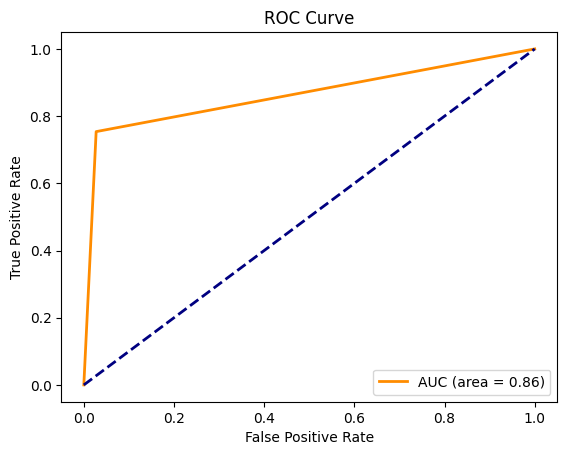

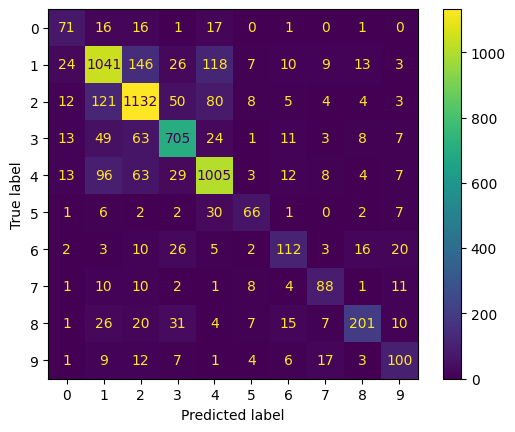

Accuracy: 0.7538769384692346
F1 Score: 0.754499427860584
Precision: 0.7542856430357494
Recall/Sensitivity/True Positive Rate: 0.7538769384692346
False Positive Rate: [0.         0.02734701 1.        ]
Area under ROC curve: 0.8501277789187455
Confusion Matrix:
 [[  71   16   16    1   17    0    1    0    1    0]
 [  24 1041  146   26  118    7   10    9   13    3]
 [  12  121 1132   50   80    8    5    4    4    3]
 [  13   49   63  705   24    1   11    3    8    7]
 [  13   96   63   29 1005    3   12    8    4    7]
 [   1    6    2    2   30   66    1    0    2    7]
 [   2    3   10   26    5    2  112    3   16   20]
 [   1   10   10    2    1    8    4   88    1   11]
 [   1   26   20   31    4    7   15    7  201   10]
 [   1    9   12    7    1    4    6   17    3  100]]


In [185]:
train_test_split(X30,Xt30,yt30,y30)

60% data

In [194]:
model = gridsearch(X60,y60) #getting the best parameters model given by the search algorithm
accuracycalc(model,X60,y60,Xt60,yt60)#calculating the accuracy on the model found

Accuracy: 0.7650494159928122


In [195]:
model = randomsearch(X60,y60) #getting the best parameters model given by the search algorithm
accuracycalc(model,X60,y60,Xt60,yt60)#calculating the accuracy on the model found

Accuracy: 0.762915543575921


In [196]:
model = bayesearch(X60,y60) #getting the best parameters model given by the search algorithm
accuracycalc(model,X60,y60,Xt60,yt60)#calculating the accuracy on the model found

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

Accuracy: 0.7677448337825696


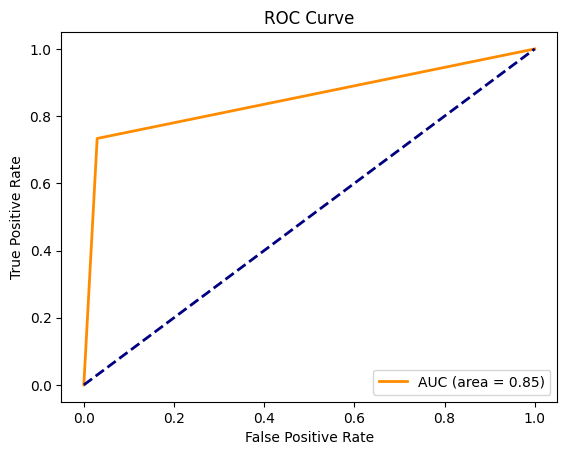

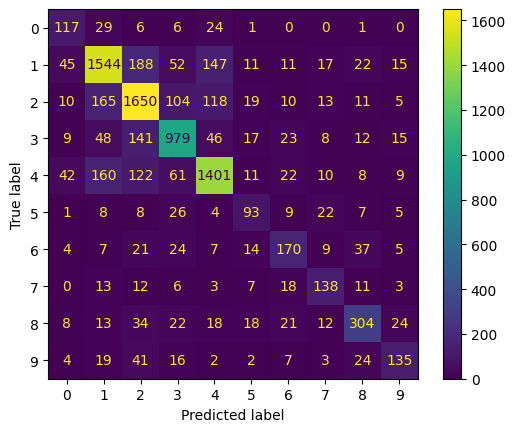

Accuracy: 0.7334905660377359
F1 Score: 0.7331237347172506
Precision: 0.7354932184635244
Recall/Sensitivity/True Positive Rate: 0.7334905660377359
False Positive Rate: [0.         0.02961216 1.        ]
Area under ROC curve: 0.8393766033743908
Confusion Matrix:
 [[ 117   29    6    6   24    1    0    0    1    0]
 [  45 1544  188   52  147   11   11   17   22   15]
 [  10  165 1650  104  118   19   10   13   11    5]
 [   9   48  141  979   46   17   23    8   12   15]
 [  42  160  122   61 1401   11   22   10    8    9]
 [   1    8    8   26    4   93    9   22    7    5]
 [   4    7   21   24    7   14  170    9   37    5]
 [   0   13   12    6    3    7   18  138   11    3]
 [   8   13   34   22   18   18   21   12  304   24]
 [   4   19   41   16    2    2    7    3   24  135]]


In [197]:
train_test_split(X60,Xt60,yt60,y60)

### Preprocessed Data

#### 30% data

In [198]:
model = gridsearch(X30_pro,y30_pro) #getting the best parameters model given by the search algorithm
accuracycalc(model,X30_pro,y30_pro,Xt30_pro,yt30_pro)#calculating the accuracy on the model found

Accuracy: 0.807903951975988


In [199]:
model = randomsearch(X30_pro,y30_pro) #getting the best parameters model given by the search algorithm
accuracycalc(model,X30_pro,y30_pro,Xt30_pro,yt30_pro)#calculating the accuracy on the model found

Accuracy: 0.8137402034350508


In [200]:
model = bayesearch(X30_pro,y30_pro) #getting the best parameters model given by the search algorithm
accuracycalc(model,X30_pro,y30_pro,Xt30_pro,yt30_pro)#calculating the accuracy on the model found

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

Accuracy: 0.8032349508087377


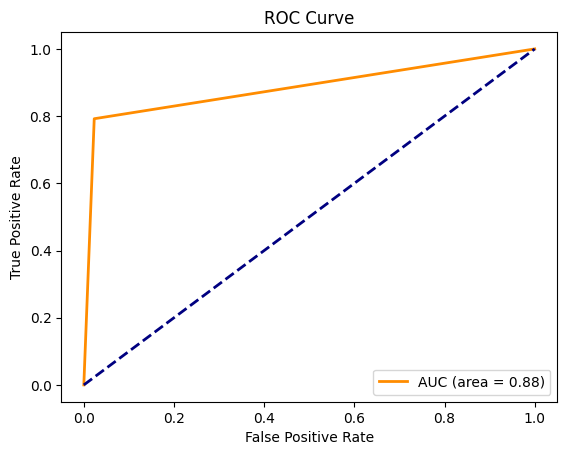

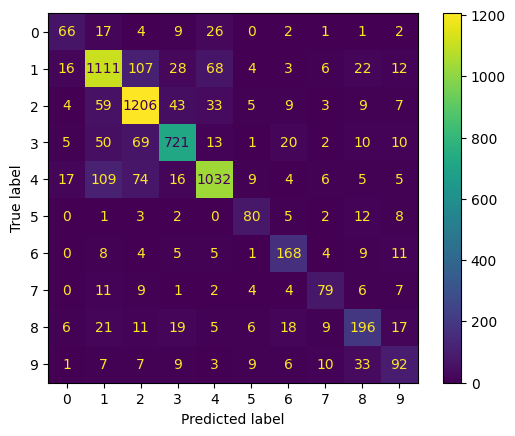

Accuracy: 0.7922294480573621
F1 Score: 0.7925641364114279
Precision: 0.7931131140287712
Recall/Sensitivity/True Positive Rate: 0.7922294480573621
False Positive Rate: [0.         0.02308562 1.        ]
Area under ROC curve: 0.8753463449215033
Confusion Matrix:
 [[  66   17    4    9   26    0    2    1    1    2]
 [  16 1111  107   28   68    4    3    6   22   12]
 [   4   59 1206   43   33    5    9    3    9    7]
 [   5   50   69  721   13    1   20    2   10   10]
 [  17  109   74   16 1032    9    4    6    5    5]
 [   0    1    3    2    0   80    5    2   12    8]
 [   0    8    4    5    5    1  168    4    9   11]
 [   0   11    9    1    2    4    4   79    6    7]
 [   6   21   11   19    5    6   18    9  196   17]
 [   1    7    7    9    3    9    6   10   33   92]]


In [201]:
train_test_split(X30_pro,Xt30_pro,yt30_pro,y30_pro)

#### 60% data

In [202]:
model = gridsearch(X60_pro,y60_pro) #getting the best parameters model given by the search algorithm
accuracycalc(model,X60_pro,y60_pro,Xt60_pro,yt60_pro)#calculating the accuracy on the model found

Accuracy: 0.7603324348607368


In [203]:
model = randomsearch(X60_pro,y60_pro) #getting the best parameters model given by the search algorithm
accuracycalc(model,X60_pro,y60_pro,Xt60_pro,yt60_pro)#calculating the accuracy on the model found

Accuracy: 0.7642632524707996


In [204]:
model = bayesearch(X60_pro,y60_pro) #getting the best parameters model given by the search algorithm
accuracycalc(model,X60_pro,y60_pro,Xt60_pro,yt60_pro)#calculating the accuracy on the model found

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

Accuracy: 0.7687556154537286


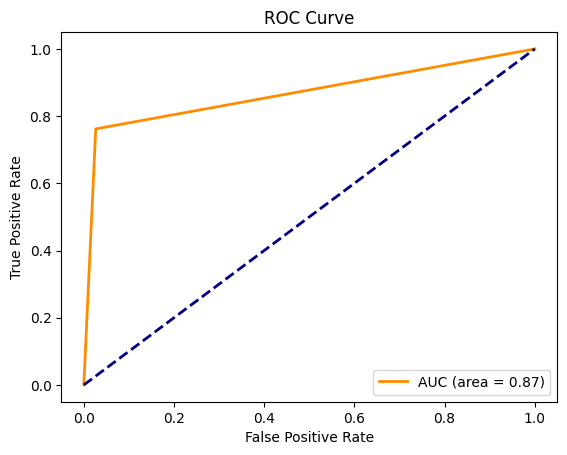

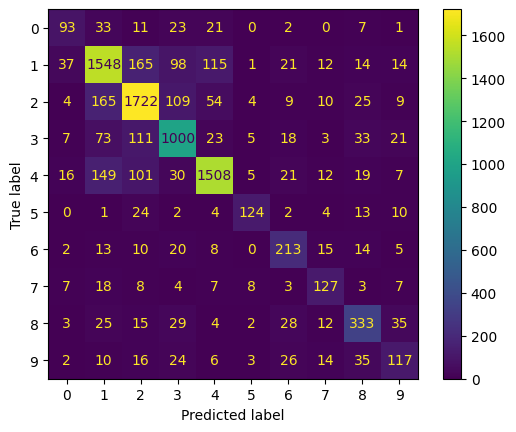

Accuracy: 0.7620170709793351
F1 Score: 0.7620250442331314
Precision: 0.7632397636776479
Recall/Sensitivity/True Positive Rate: 0.7620170709793351
False Positive Rate: [0.         0.02644255 1.        ]
Area under ROC curve: 0.856875991242887
Confusion Matrix:
 [[  93   33   11   23   21    0    2    0    7    1]
 [  37 1548  165   98  115    1   21   12   14   14]
 [   4  165 1722  109   54    4    9   10   25    9]
 [   7   73  111 1000   23    5   18    3   33   21]
 [  16  149  101   30 1508    5   21   12   19    7]
 [   0    1   24    2    4  124    2    4   13   10]
 [   2   13   10   20    8    0  213   15   14    5]
 [   7   18    8    4    7    8    3  127    3    7]
 [   3   25   15   29    4    2   28   12  333   35]
 [   2   10   16   24    6    3   26   14   35  117]]


In [205]:
train_test_split(X60_pro,Xt60_pro,yt60_pro,y60_pro)

### Now we apply kfold on the 30% and 60% data

#### Raw data

In [206]:
kfold_10(X30,y30) #applying kfold and getting the accuracy

Train: 6104 Validation: 679
Confusion Matrix:
 [[  7   1   1   0   1   0   1   0   0   0]
 [  0 123   9   4  14   0   2   1   0   1]
 [  3  16 129   9   9   1   1   0   1   1]
 [  0   3   8  76   5   0   1   0   0   1]
 [  1  13   8   1 129   0   1   0   0   0]
 [  0   0   1   0   1   9   1   0   0   0]
 [  0   2   1   1   0   0  20   0   0   0]
 [  0   2   0   0   0   0   1  11   1   0]
 [  0   1   0   0   0   1   0   1  25   0]
 [  0   0   0   0   1   1   1   0   0  15]]
Train: 6104 Validation: 679
Confusion Matrix:
 [[  6   2   1   0   0   0   0   0   0   0]
 [  2 122  17   2   9   1   0   0   1   0]
 [  2  15 133   4   4   0   1   2   0   0]
 [  0   2   5  76   0   0   0   3   1   0]
 [  1   3   4   5 124   0   0   0   0   0]
 [  0   0   0   0   0   7   0   0   0   3]
 [  0   0   1   2   2   0  22   0   2   1]
 [  0   0   0   0   0   1   0   9   0   0]
 [  0   2   1   2   0   2   3   2  34   4]
 [  0   2   0   5   2   0   0   2   2  18]]
Train: 6104 Validation: 679
Confusion Matrix

In [207]:
kfold_10(X60,y60) #applying kfold and getting the accuracy

Train: 3488 Validation: 388
Confusion Matrix:
 [[ 3  0  2  0  2  0  0  0  0  0]
 [ 1 60  7  2  5  0  1  0  2  0]
 [ 0  7 79  2  3  0  0  0  0  0]
 [ 0  4  6 47  3  0  1  0  2  0]
 [ 1  4  4  1 71  0  0  0  1  1]
 [ 0  0  0  0  1  3  0  1  0  0]
 [ 0  1  0  1  0  1 11  0  0  0]
 [ 0  0  0  1  0  0  1  9  1  0]
 [ 1  2  1  1  0  0  0  1 14  3]
 [ 0  0  1  0  1  0  2  0  1  7]]
Train: 3488 Validation: 388
Confusion Matrix:
 [[ 5  2  1  0  0  0  0  0  0  0]
 [ 4 64  8  2  7  3  0  0  1  0]
 [ 1  8 66  3  6  2  0  1  1  0]
 [ 1  0  0 42  2  0  3  1  1  0]
 [ 0  4  2  0 74  1  0  0  1  0]
 [ 0  0  0  0  0  7  0  1  0  1]
 [ 0  0  1  1  0  1 10  0  3  0]
 [ 0  0  0  0  1  1  2  6  1  0]
 [ 0  1  0  1  0  0  4  1 15  2]
 [ 0  1  0  1  0  0  1  0  0  8]]
Train: 3488 Validation: 388
Confusion Matrix:
 [[ 4  1  0  0  1  0  1  0  0  0]
 [ 2 70 12  2  3  0  1  0  1  0]
 [ 0  9 72  3  1  0  0  0  1  1]
 [ 0  4  6 50  3  0  0  0  2  0]
 [ 1  7  0  0 59  0  0  0  1  0]
 [ 0  1  0  1  0  6  0  0  2  0]

#### Preprocessed Data

In [208]:
kfold_10(X30_pro,y30_pro) #applying kfold and getting the accuracy

Train: 6104 Validation: 679
Confusion Matrix:
 [[ 11   3   0   0   2   0   0   0   0   0]
 [  2 104   7   4   9   1   2   2   0   1]
 [  0   9 138   4  13   0   0   0   1   0]
 [  2   4   4  81   1   1   3   0   0   0]
 [  1   8   6   1 121   1   0   1   0   2]
 [  0   0   0   0   0  12   0   0   2   0]
 [  0   1   2   1   1   0  19   0   4   2]
 [  0   0   0   1   0   1   0  18   0   1]
 [  0   1   1   3   0   1   4   0  32   3]
 [  0   0   1   0   0   0   1   0   3  14]]
Train: 6104 Validation: 679
Confusion Matrix:
 [[ 14   4   3   2   1   0   0   0   0   0]
 [  0 131  18   2   7   0   1   0   0   1]
 [  1   9 140   6   5   2   0   2   0   0]
 [  0   1  15  90   1   0   1   2   2   3]
 [  1   8   3   0 103   0   5   0   0   0]
 [  0   0   0   0   0   8   0   0   0   0]
 [  0   2   1   1   0   1  10   0   0   2]
 [  0   1   1   0   1   0   0  17   0   0]
 [  0   1   1   0   0   0   2   0  23   2]
 [  0   3   0   2   1   0   0   1   2  12]]
Train: 6104 Validation: 679
Confusion Matrix

In [209]:
kfold_10(X60_pro,y60_pro) #applying kfold and getting the accuracy

Train: 3488 Validation: 388
Confusion Matrix:
 [[ 3  2  1  2  1  0  0  0  0  0]
 [ 1 68 11  1  6  0  0  0  2  0]
 [ 0 11 59  3  2  2  0  1  3  0]
 [ 1  3  8 46  1  0  1  0  1  0]
 [ 0  4  8  2 60  1  0  0  0  0]
 [ 0  0  2  0  0  7  0  1  1  0]
 [ 0  0  0  0  1  0 12  1  0  1]
 [ 0  0  1  0  0  0  0  6  1  0]
 [ 0  1  2  3  1  1  0  0 17  1]
 [ 0  0  1  2  1  1  0  0  1  7]]
Train: 3488 Validation: 388
Confusion Matrix:
 [[ 8  1  1  0  1  0  0  0  0  0]
 [ 1 82  6  5  4  0  0  0  0  1]
 [ 1  6 73  5  2  0  0  1  0  0]
 [ 0  3  2 45  0  0  1  0  2  1]
 [ 0  2  4  3 71  0  0  0  0  0]
 [ 0  0  1  0  0  6  0  0  0  0]
 [ 1  1  2  1  1  1  8  0  2  0]
 [ 0  0  1  0  1  0  0 10  1  0]
 [ 1  1  0  2  0  0  0  0  3  4]
 [ 0  0  0  1  1  0  0  0  1  5]]
Train: 3488 Validation: 388
Confusion Matrix:
 [[ 8  1  0  1  0  0  0  0  0  0]
 [ 3 67  7  3  8  0  0  2  0  1]
 [ 2  9 60 12  5  0  0  0  1  1]
 [ 0  4  3 47  1  0  0  0  0  0]
 [ 1  2  1  1 66  0  1  0  0  0]
 [ 0  0  1  2  0  8  0  0  2  0]

### Random forest Classifier

In [210]:
from sklearn.ensemble import RandomForestClassifier

def randomforestClassifier(xdata,ydata,xtest,ytest):
    # Create a Random Forest Classifier
    clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=19)

    # Train the model
    clf.fit(xdata, ydata)

    # Make predictions on the test set
    y_pred = clf.predict(xtest)

    # Evaluate accuracy
    accuracy = accuracy_score(ytest, y_pred)
    print(f"Accuracy: {accuracy}")


Random forest classifier on the split data for both raw and preprocessed data , raw data, equilized (preprocessed) data

In [211]:
randomforestClassifier(X30,y30,Xt30,yt30)

/var/folders/qk/mydg_vvd1gv6z5wlj72s23lm0000gn/T/ipykernel_81376/1322765778.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xdata, ydata)


Accuracy: 0.83925295981324


In [212]:
randomforestClassifier(X60,y60,Xt60,yt60)

/var/folders/qk/mydg_vvd1gv6z5wlj72s23lm0000gn/T/ipykernel_81376/1322765778.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xdata, ydata)


Accuracy: 0.8556828391734053


In [213]:
randomforestClassifier(X30_pro,y30_pro,Xt30_pro,yt30_pro)

/var/folders/qk/mydg_vvd1gv6z5wlj72s23lm0000gn/T/ipykernel_81376/1322765778.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xdata, ydata)


Accuracy: 0.9061197265299317


In [214]:
randomforestClassifier(X60_pro,y60_pro,Xt60_pro,yt60_pro)

/var/folders/qk/mydg_vvd1gv6z5wlj72s23lm0000gn/T/ipykernel_81376/1322765778.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xdata, ydata)


Accuracy: 0.890947888589398


In [215]:
randomforestClassifier(x_train_all,y_train_all,x_test_all,y_test_all)

/var/folders/qk/mydg_vvd1gv6z5wlj72s23lm0000gn/T/ipykernel_81376/1322765778.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xdata, ydata)


Accuracy: 0.7640776699029126


In [216]:
randomforestClassifier(equalized_df,y_train_all,equalized_df_test,y_test_all)

/var/folders/qk/mydg_vvd1gv6z5wlj72s23lm0000gn/T/ipykernel_81376/1322765778.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xdata, ydata)


Accuracy: 0.8796116504854369


### Visualization for Kfold to check overfitting

In [218]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

def learn_curve(inp,lab):
    dt_classifier = DecisionTreeClassifier()

    train_sizes, train_scores, val_scores = learning_curve(
        dt_classifier, inp, lab, cv=KFold(n_splits=10,shuffle=True), 
        train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1,
                    color="green")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                    val_scores_mean + val_scores_std, alpha=0.1, color="red")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="red", label="Training score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="green", label="Cross-validation score")

    plt.title("Decision Tree Learning Curve")
    plt.xlabel("Number of training examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.show()

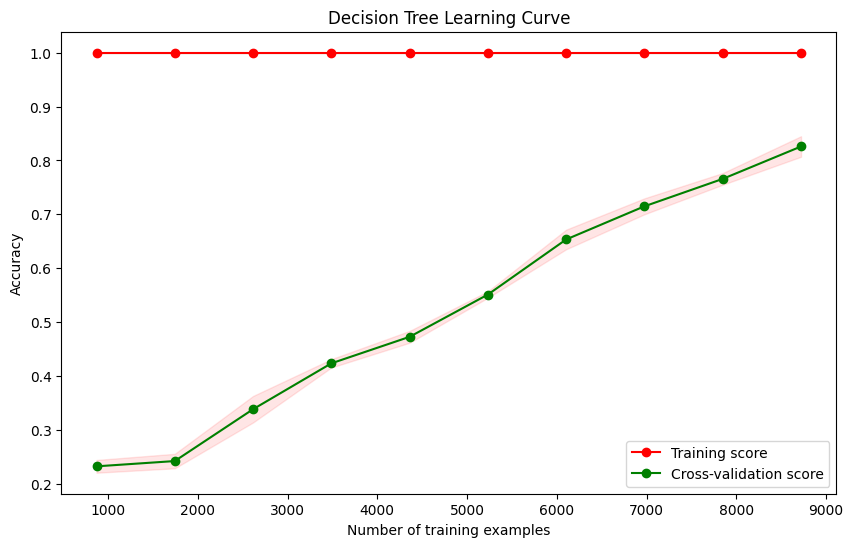

In [219]:
learn_curve(x_train_all,y_train_all)

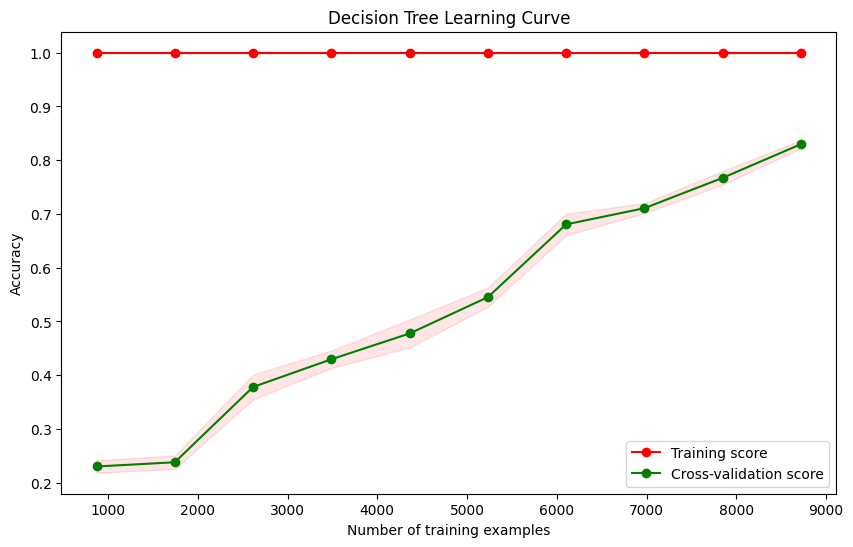

In [220]:
learn_curve(equalized_df,y_train_all)

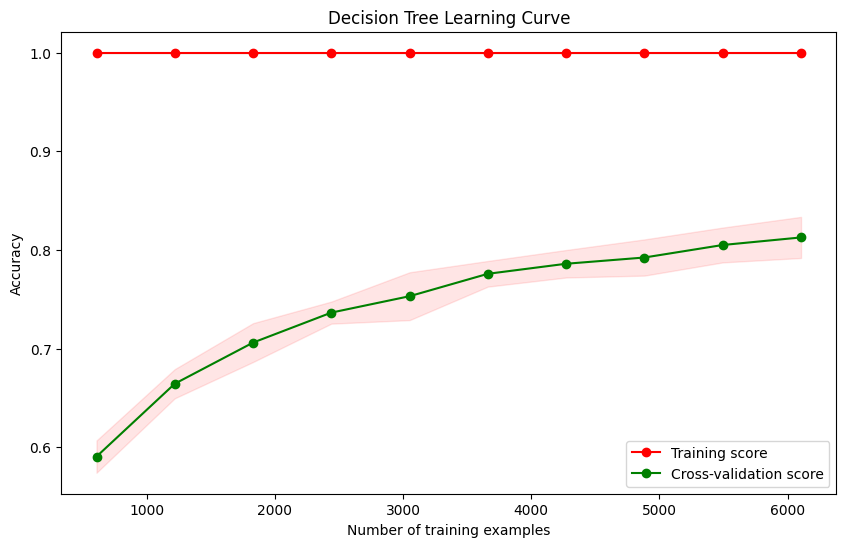

In [221]:
learn_curve(X30,y30)

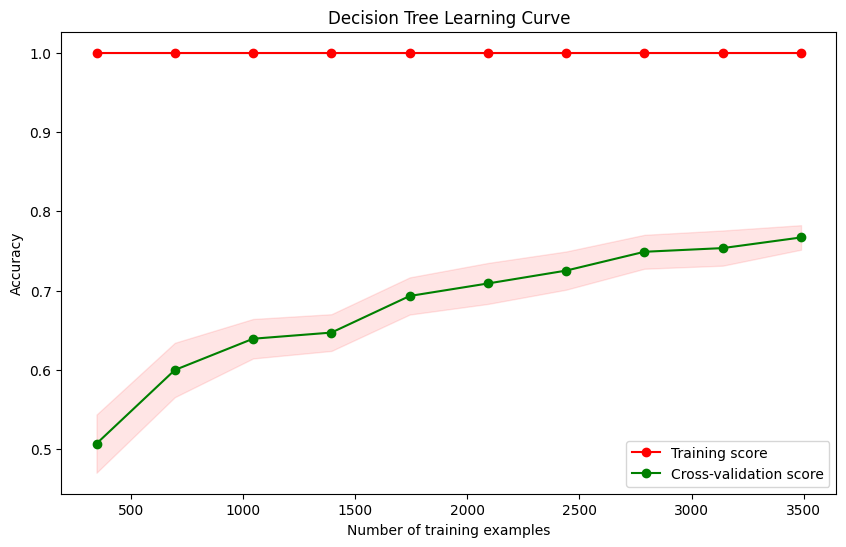

In [222]:
learn_curve(X60,y60)